# Stores Locations Installation Problem 

In [1]:
from amplpy import AMPL, Environment
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Ask for the AMPL folder path
amplUserFolder = input("path of the AMPL folder: ")

In [3]:
# Ask for the input data file
inputFilePath = input("path of the input file (.dat): ") or "inputs/minimart-I-50.dat"

path of the input file (.dat): 


In [4]:
# Create an AMPL instance
ampl = AMPL(Environment(amplUserFolder))

# Interpret the two files
ampl.read('minimart_sol.mod')
ampl.read_data(inputFilePath)

In [5]:
# Save parameters from the input file 
n = int(ampl.get_parameter('n').value()) #number of villages

coordX = ampl.get_parameter('Cx').get_values().toDict() #village coord x
coordY = ampl.get_parameter('Cy').get_values().toDict() #village coord y 
usable = ampl.get_parameter('usable').get_values().toDict() #village i can be used to build a store
dc = ampl.get_parameter('Dc').get_values().toDict() #cost to build a store in village i

rng = int(ampl.get_parameter('range').value()) 

distances = ampl.get_parameter('distance').get_values().to_dict() #distances from i to j
vc = ampl.get_parameter('Vc').value() #driving cost per kilometer 
fc = ampl.get_parameter('Fc').value() #fixed fee for each driver
capacity = ampl.get_parameter('capacity').value() #capacity of each truck 

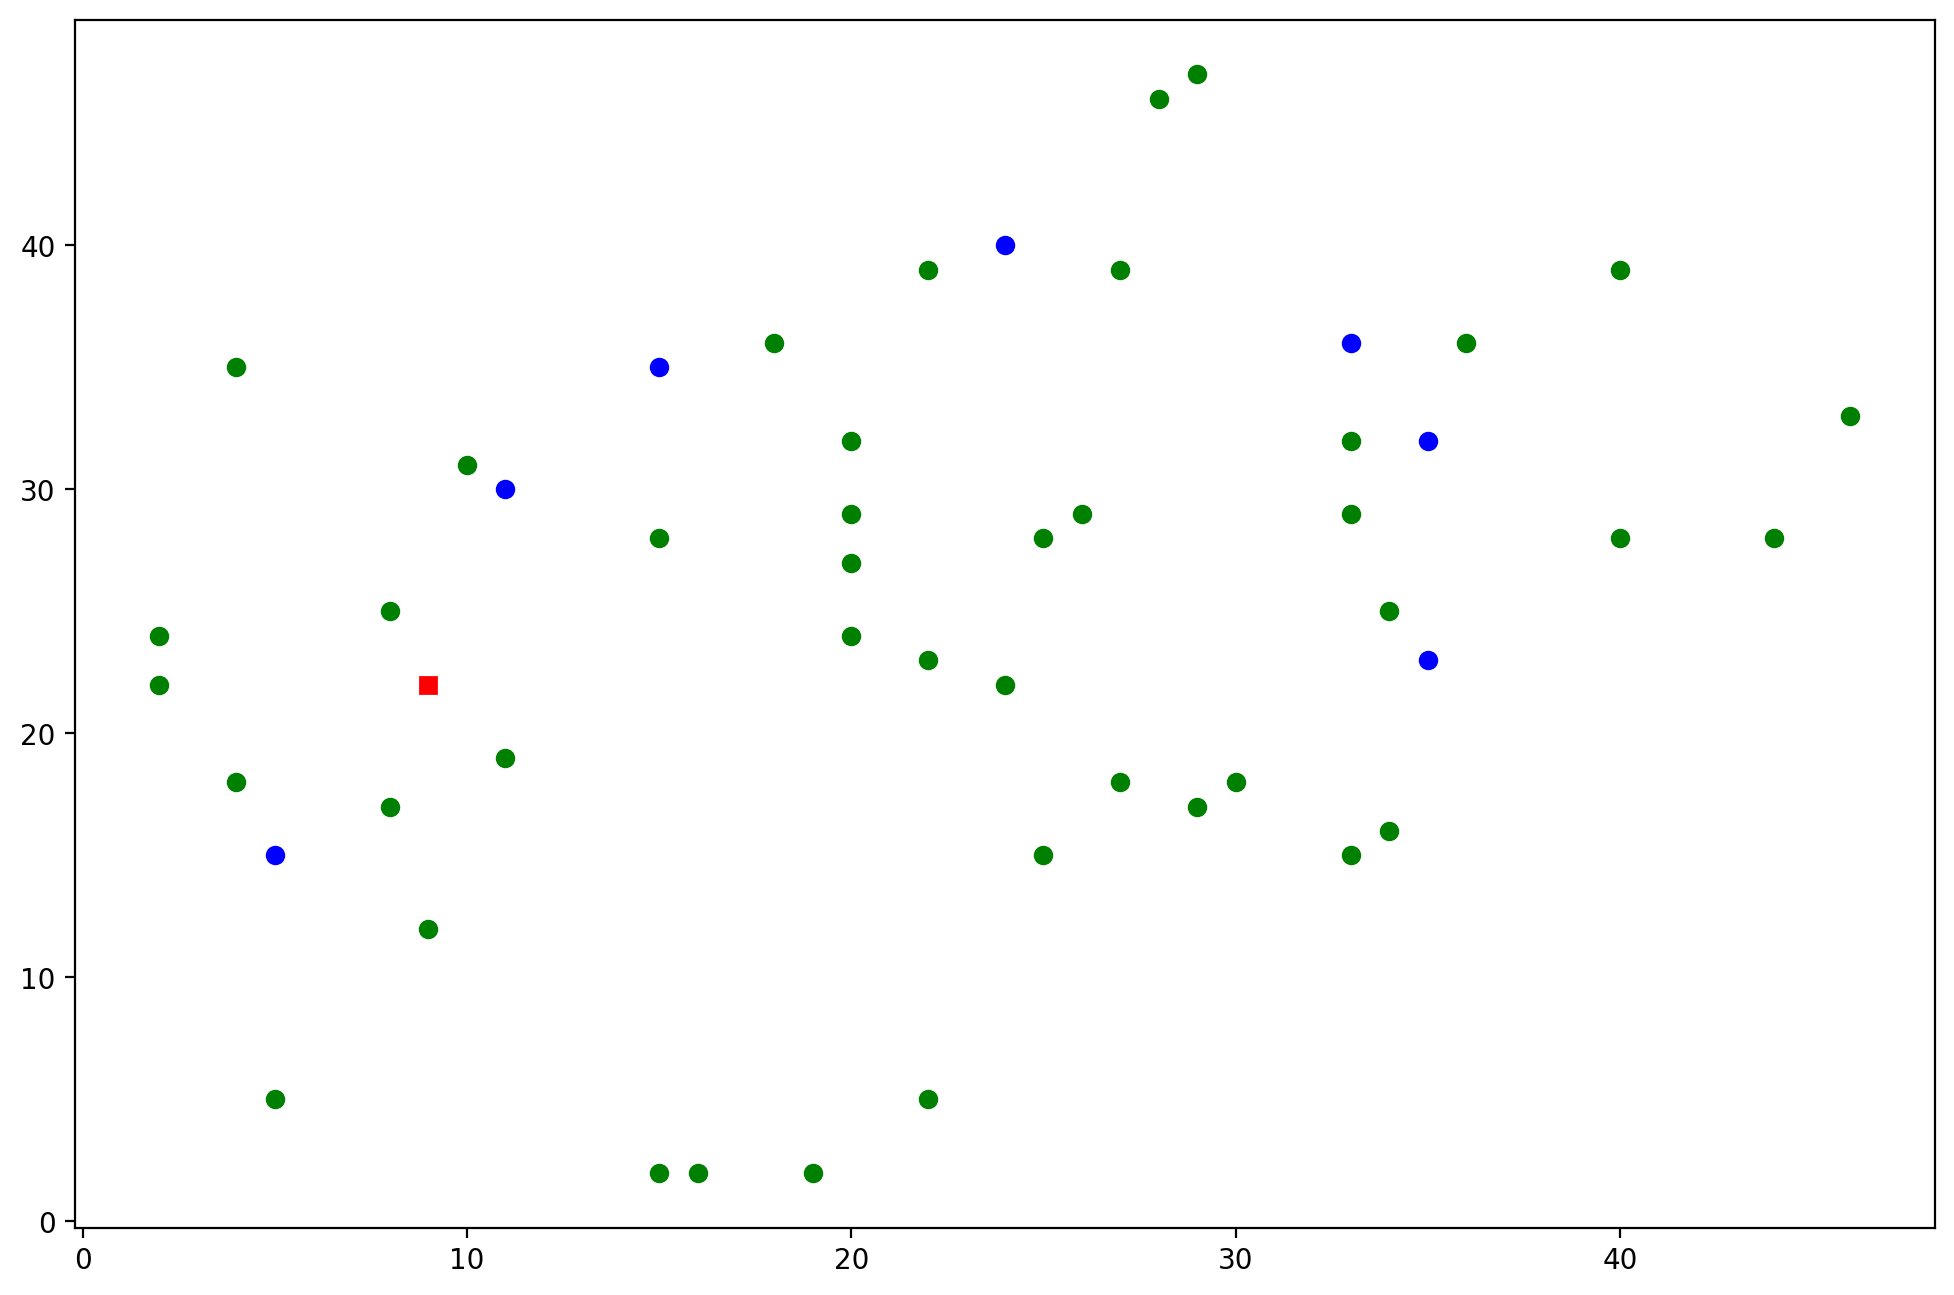

In [6]:
# Plot the region 
# red = depot, green = usable sites, blue = non usable sites
fig = plt.figure()
fig.set_size_inches(12,8)
fig.set_dpi(200)
plot = fig.add_subplot()
plot.plot(coordX.get(1), coordY.get(1), c='r',marker='s') #depot

usableCX = dict()
usableCY = dict()
nonUsableCX = dict()
nonUsableCY = dict()

for i in range(2,n+1):
    if usable.get(i)==1:
        usableCX.update({i: coordX.get(i)})
        usableCY.update({i: coordY.get(i)})
    else:    
        nonUsableCX.update({i: coordX.get(i)})
        nonUsableCY.update({i: coordY.get(i)})
        
plot.scatter(list(usableCX.values()), list(usableCY.values()), c='g') 
plot.scatter(list(nonUsableCX.values()), list(nonUsableCY.values()) , c='b') 

In [7]:
# Solve the store locations installation problem 
ampl.set_option('solver', amplUserFolder+"/cplex")
ampl.solve()

CPLEX 20.1.0.0: optimal integer solution; objective 65
0 MIP simplex iterations
0 branch-and-bound nodes


In [8]:
totalcost = ampl.get_objective('cost')
# Print it
print("Objective is:", totalcost.value())

Objective is: 65.0


In [9]:
stores = ampl.get_variable('y').get_values().toDict()
ampl.close()

# Installed stores coordinates          
storesCoords = list()

storesIndxs = list()

for i in range(1, len(stores)+1):
    if stores.get(i) == 1:
        storesCoords.append((coordX.get(i), coordY.get(i)))
        storesIndxs.append(i)
        
storesCoords

[(9.0, 22.0),
 (22.0, 5.0),
 (15.0, 2.0),
 (4.0, 18.0),
 (34.0, 25.0),
 (46.0, 33.0),
 (28.0, 46.0),
 (5.0, 5.0),
 (10.0, 31.0),
 (22.0, 39.0),
 (25.0, 28.0),
 (36.0, 36.0),
 (4.0, 35.0),
 (9.0, 12.0),
 (30.0, 18.0)]

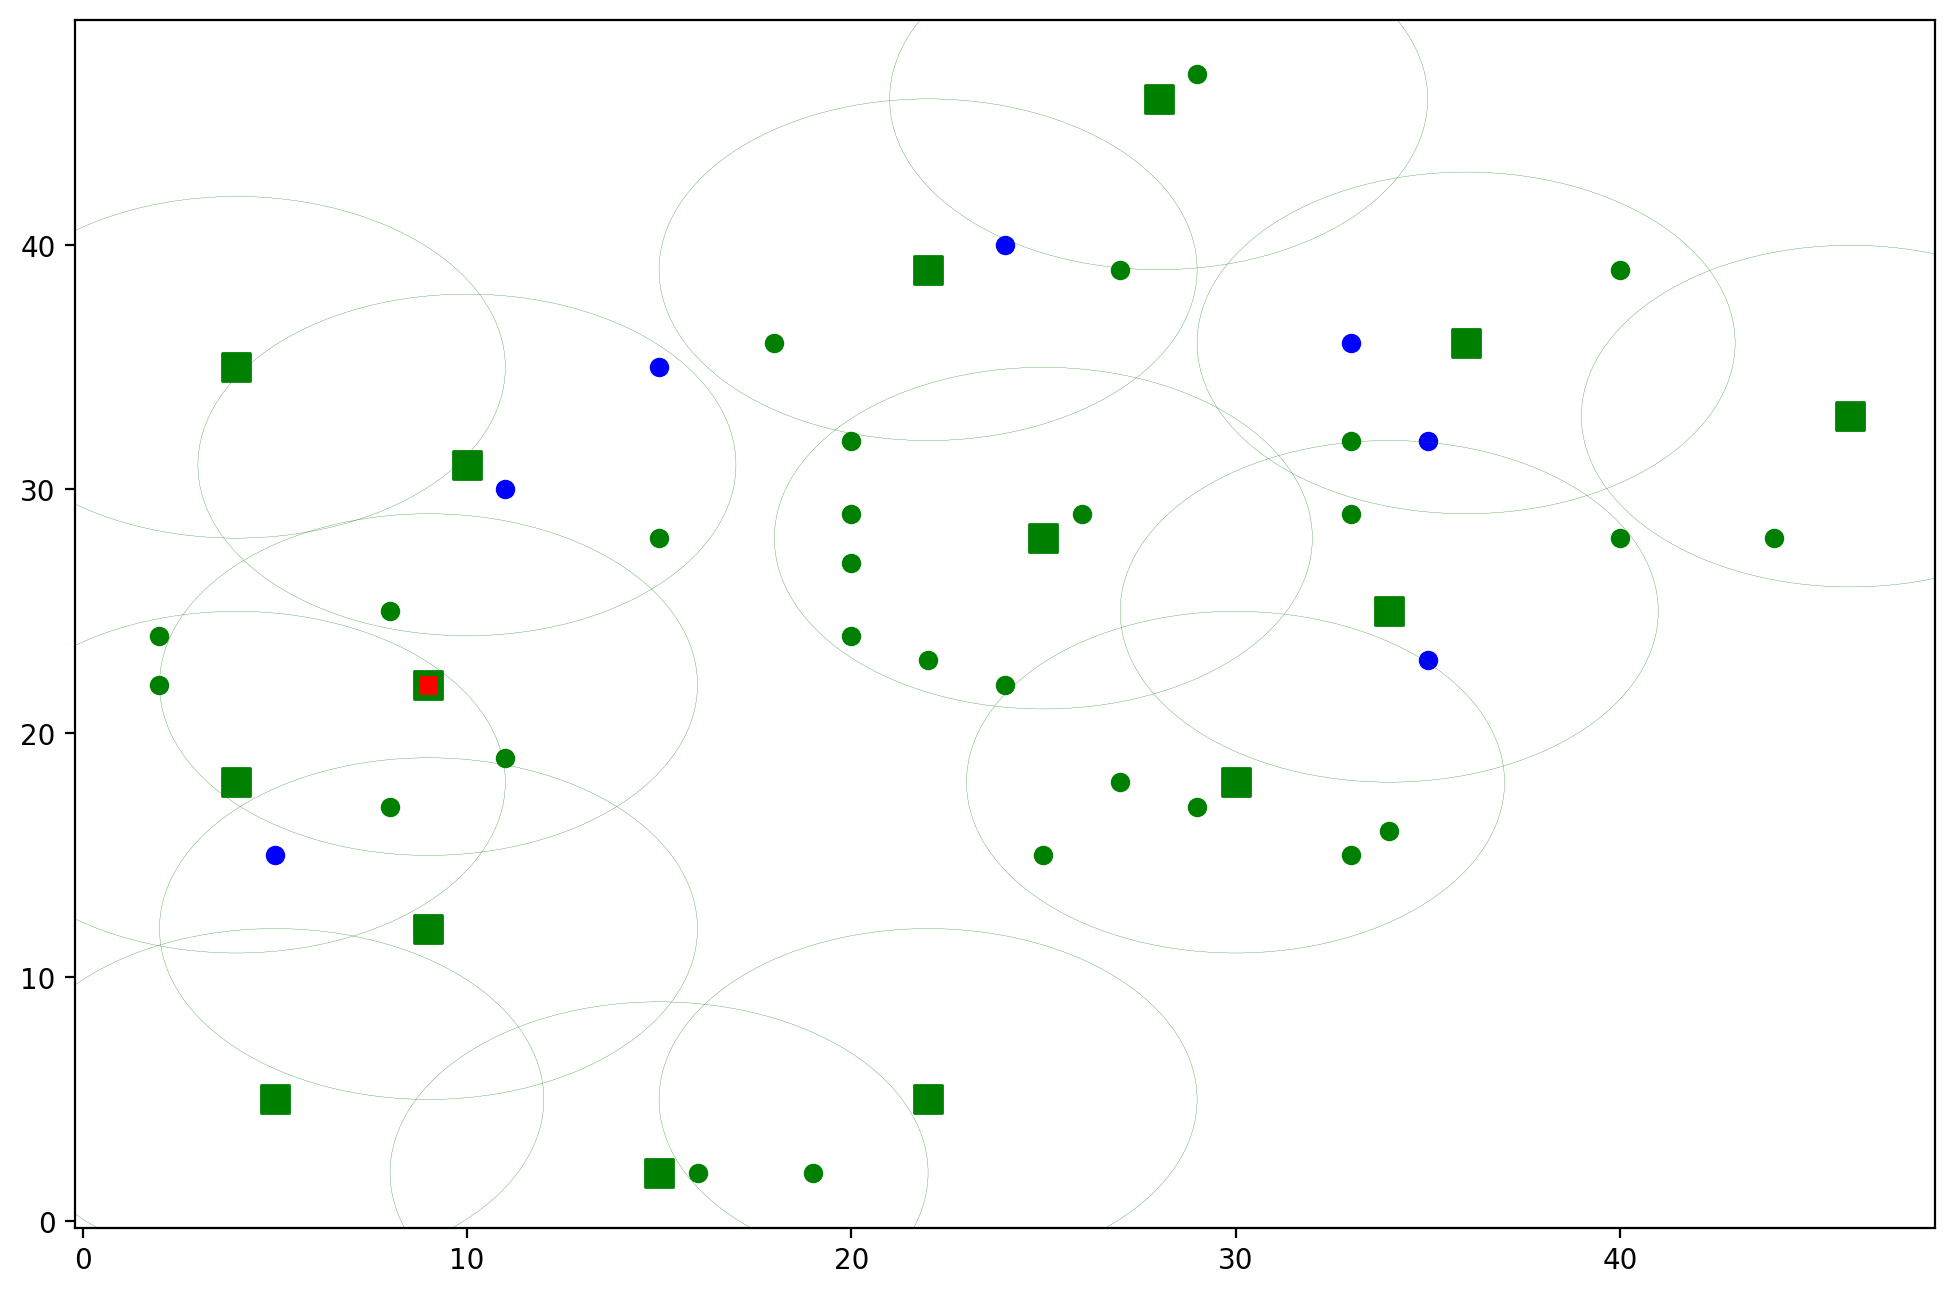

In [10]:
plot.scatter([c[0] for c in storesCoords], [c[1] for c in storesCoords], c='g', marker='s', s=100)
for c in storesCoords:
    plot.add_artist(plt.Circle(c, rng, color='g', fill=False, linewidth=0.1))   
fig

# Refurbishing Routes Problem

In [11]:
distances

{(1.0, 1.0): 0.0,
 (1.0, 2.0): 21.400934559032695,
 (1.0, 3.0): 5.0990195135927845,
 (1.0, 4.0): 7.0,
 (1.0, 5.0): 13.038404810405298,
 (1.0, 6.0): 7.280109889280518,
 (1.0, 7.0): 17.46424919657298,
 (1.0, 8.0): 11.180339887498949,
 (1.0, 9.0): 20.8806130178211,
 (1.0, 10.0): 6.4031242374328485,
 (1.0, 11.0): 32.01562118716424,
 (1.0, 12.0): 25.179356624028344,
 (1.0, 13.0): 24.758836806279895,
 (1.0, 14.0): 38.600518131237564,
 (1.0, 15.0): 25.0,
 (1.0, 16.0): 30.610455730027933,
 (1.0, 17.0): 35.510561809129406,
 (1.0, 18.0): 26.0,
 (1.0, 19.0): 26.019223662515376,
 (1.0, 20.0): 35.35533905932738,
 (1.0, 21.0): 25.0,
 (1.0, 22.0): 17.46424919657298,
 (1.0, 23.0): 27.784887978899608,
 (1.0, 24.0): 9.055385138137417,
 (1.0, 25.0): 23.430749027719962,
 (1.0, 26.0): 8.48528137423857,
 (1.0, 27.0): 27.85677655436824,
 (1.0, 28.0): 14.317821063276353,
 (1.0, 29.0): 22.360679774997898,
 (1.0, 30.0): 16.64331697709324,
 (1.0, 31.0): 20.615528128088304,
 (1.0, 32.0): 18.439088914585774,
 (1.0

In [12]:
def computeSavings():
    savings = [(distances.get((1,i))+distances.get((1,j))-distances.get((i,j)), i, j) for i in storesIndxs  for j in storesIndxs if i!=j and i>j]
    savings.sort(reverse=True)
    return savings     

In [13]:
savings = computeSavings()

## TODO: Clarke-Wright

In [14]:
routes = [(1,i,1) for i in storesIndxs if i>1]
routes

[(1, 2, 1),
 (1, 9, 1),
 (1, 10, 1),
 (1, 12, 1),
 (1, 14, 1),
 (1, 16, 1),
 (1, 22, 1),
 (1, 24, 1),
 (1, 36, 1),
 (1, 40, 1),
 (1, 42, 1),
 (1, 43, 1),
 (1, 45, 1),
 (1, 50, 1)]

In [ ]:
def clarke_wright():
    while(savings.count>0):
        currSaving = savings.pop()
        r1, r2 = findRoutesPassingThrough(currSaving[1],[2])
        mergeRoutes(r1, r2)
        

In [ ]:
def findRoutesPassingThrough(s1, s2):
    for route in routes:
        if currSaving[1] in route:
            r1 = route
        if currSaving[1] in route:
            r2 = route
    return r1, r2            

In [ ]:
#def mergeRoutes